In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from scipy.stats import pearsonr as p1
from scipy.stats import spearmanr as p2
from scipy.stats import pointbiserialr as p3
import matplotlib.pyplot as plt

data = pd.read_csv("data/kc1reg.csv")

## Get a list of all available features

In [8]:
features = list(data.columns.values)
features

['PERCENT_PUB_DATA',
 'ACCESS_TO_PUB_DATA',
 'COUPLING_BETWEEN_OBJECTS',
 'DEPTH',
 'LACK_OF_COHESION_OF_METHODS',
 'NUM_OF_CHILDREN',
 'DEP_ON_CHILD',
 'FAN_IN',
 'RESPONSE_FOR_CLASS',
 'WEIGHTED_METHODS_PER_CLASS',
 'minLOC_BLANK',
 'minBRANCH_COUNT',
 'minLOC_CODE_AND_COMMENT',
 'minLOC_COMMENTS',
 'minCYCLOMATIC_COMPLEXITY',
 'minDESIGN_COMPLEXITY',
 'minESSENTIAL_COMPLEXITY',
 'minLOC_EXECUTABLE',
 'minHALSTEAD_CONTENT',
 'minHALSTEAD_DIFFICULTY',
 'minHALSTEAD_EFFORT',
 'minHALSTEAD_ERROR_EST',
 'minHALSTEAD_LENGTH',
 'minHALSTEAD_LEVEL',
 'minHALSTEAD_PROG_TIME',
 'minHALSTEAD_VOLUME',
 'minNUM_OPERANDS',
 'minNUM_OPERATORS',
 'minNUM_UNIQUE_OPERANDS',
 'minNUM_UNIQUE_OPERATORS',
 'minLOC_TOTAL',
 'maxLOC_BLANK',
 'maxBRANCH_COUNT',
 'maxLOC_CODE_AND_COMMENT',
 'maxLOC_COMMENTS',
 'maxCYCLOMATIC_COMPLEXITY',
 'maxDESIGN_COMPLEXITY',
 'maxESSENTIAL_COMPLEXITY',
 'maxLOC_EXECUTABLE',
 'maxHALSTEAD_CONTENT',
 'maxHALSTEAD_DIFFICULTY',
 'maxHALSTEAD_EFFORT',
 'maxHALSTEAD_ERROR_EST'

## Check distributiuon of target variable and lines of code

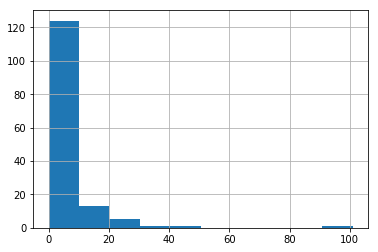

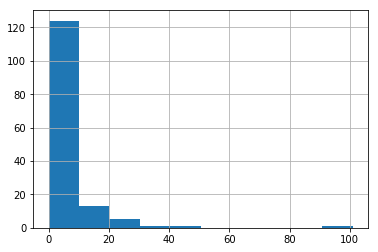

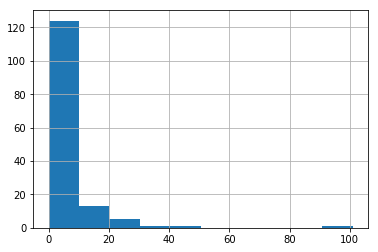

In [16]:
plt.figure()
p = data['NUMDEFECTS'].hist()
plt.show()

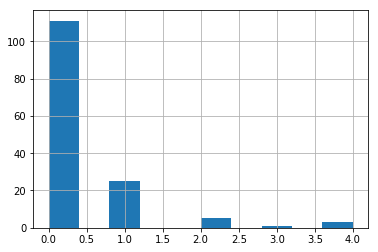

In [18]:
plt.figure()
p = data['minLOC_EXECUTABLE'].hist()
plt.show()

## Calculate correlation between features

In [22]:
corr_mat = data.corr()
corr_mat

,PERCENT_PUB_DATA,ACCESS_TO_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,NUMDEFECTS
PERCENT_PUB_DATA,1.000000,NaN,0.046349,-0.070570,0.265008,0.126902,-0.052528,-0.011297,0.057193,0.146672,...,0.061027,0.208802,0.011226,0.059427,0.067193,0.057063,0.096266,0.058739,0.093419,0.101936
ACCESS_TO_PUB_DATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COUPLING_BETWEEN_OBJECTS,0.046349,NaN,1.000000,0.469952,0.256509,-0.032457,0.180199,0.460154,0.386982,0.245133,...,0.484668,0.283352,0.361761,0.470723,0.471746,0.491679,0.499698,0.460231,0.560864,0.365647
DEPTH,-0.070570,NaN,0.469952,1.000000,0.256580,-0.031578,0.000000,0.746053,0.654133,0.136320,...,0.257566,0.013531,0.202599,0.254246,0.239845,0.268043,0.226541,0.217041,0.328559,0.037103
LACK_OF_COHESION_OF_METHODS,0.265008,NaN,0.256509,0.256580,1.000000,-0.028396,0.100616,0.232930,0.334172,0.318096,...,0.219899,0.324368,0.190392,0.215262,0.215195,0.222358,0.215656,0.227400,0.234457,0.126120
NUM_OF_CHILDREN,0.126902,NaN,-0.032457,-0.031578,-0.028396,1.000000,0.133465,-0.080986,-0.049599,0.035843,...,-0.049537,-0.011944,-0.049298,-0.050386,-0.056583,-0.045049,-0.060979,-0.051825,-0.045681,-0.105233
DEP_ON_CHILD,-0.052528,NaN,0.180199,0.000000,0.100616,0.133465,1.000000,0.062380,0.011869,-0.030066,...,-0.018735,0.004632,-0.015128,-0.018575,-0.013357,-0.022042,-0.018040,-0.024209,-0.015707,-0.012173
FAN_IN,-0.011297,NaN,0.460154,0.746053,0.232930,-0.080986,0.062380,1.000000,0.528571,0.106053,...,0.272538,0.016241,0.198022,0.267389,0.260495,0.279452,0.251438,0.211679,0.325959,0.100739
RESPONSE_FOR_CLASS,0.057193,NaN,0.386982,0.654133,0.334172,-0.049599,0.011869,0.528571,1.000000,0.628313,...,0.466998,0.433353,0.372326,0.447327,0.454550,0.473751,0.484224,0.532091,0.515543,0.272159
WEIGHTED_METHODS_PER_CLASS,0.146672,NaN,0.245133,0.136320,0.318096,0.035843,-0.030066,0.106053,0.628313,1.000000,...,0.638105,0.764964,0.528566,0.603939,0.630866,0.641255,0.690677,0.785549,0.650313,0.463304


Correlation of all features with "ACCESS_TO_PUB_DATA"  is undefined. Warrantes a closer look.

In [23]:
data.head()

,PERCENT_PUB_DATA,ACCESS_TO_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,NUMDEFECTS
0,0,0,24,4,100,0,0,2,110,73,...,7376,8.39,50969.11,38600.75,2575,4801,1066,832,2828,23
1,0,0,19,4,100,0,0,3,78,30,...,3350,4.40,22480.91,18081.27,1168,2182,483,336,1221,16
2,100,0,13,1,88,0,0,0,99,99,...,3377,32.51,7318.61,15736.22,1278,2099,813,608,1522,3
3,0,0,21,4,100,0,0,2,68,30,...,3745,3.95,22958.05,20114.74,1393,2352,551,333,1408,19
4,5,0,17,2,90,0,0,1,69,36,...,1412,15.06,5723.73,7030.53,509,903,290,229,504,6


In [24]:
data.tail()

,PERCENT_PUB_DATA,ACCESS_TO_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,NUMDEFECTS
140,0,0,1,2,0,0,0,1,2,2,...,7,0.40,2.15,15.51,2,5,2,5,5,0
141,17,0,1,4,100,0,0,1,198,24,...,4,0.67,0.67,8.00,1,3,1,3,1,0
142,0,0,0,3,0,0,0,2,60,5,...,0,0.00,0.00,0.00,0,0,0,0,1,0
143,0,0,0,1,98,0,0,0,37,34,...,4,0.67,0.67,8.00,1,3,1,3,1,0
144,0,0,0,1,100,0,0,0,7,7,...,0,0.00,0.00,0.00,0,0,0,0,1,0


First 5 and last 5 rows of the feature "ACCESS_TO_PUB_DATA" are set to 0. Take a look at other summary statistics of that feature and all others too.

In [28]:
data.describe()

,PERCENT_PUB_DATA,ACCESS_TO_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,NUMDEFECTS
count,145.000000,145.0,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,14.400000,0.0,8.317241,2.000000,68.724138,0.213793,0.013793,0.634483,34.379310,17.420690,...,724.744828,4.632414,4236.093034,3762.683310,273.234483,451.510345,138.703448,110.986207,296.296552,4.613793
std,32.532975,0.0,6.376719,1.258306,36.888624,0.699069,0.117036,0.695360,36.202952,17.449001,...,1312.710500,4.678093,11137.125253,7276.130736,504.084429,810.343687,218.425430,161.695959,448.015766,10.858424
min,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.0,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,10.000000,8.000000,...,48.000000,1.670000,20.620000,139.380000,18.000000,30.000000,18.000000,21.000000,44.000000,0.000000
50%,0.000000,0.0,8.000000,2.000000,84.000000,0.000000,0.000000,1.000000,28.000000,12.000000,...,372.000000,3.430000,1134.250000,1811.140000,141.000000,235.000000,79.000000,67.000000,162.000000,0.000000
75%,0.000000,0.0,14.000000,2.000000,96.000000,0.000000,0.000000,1.000000,44.000000,22.000000,...,713.000000,5.600000,3026.060000,3615.790000,261.000000,452.000000,141.000000,123.000000,315.000000,4.000000
max,100.000000,0.0,24.000000,7.000000,100.000000,5.000000,1.000000,3.000000,222.000000,100.000000,...,11172.000000,32.510000,109659.300000,63240.960000,4439.000000,6733.000000,1820.000000,1383.000000,2883.000000,101.000000


"ACCESS_TO_PUB_DATA" obviously contains all 0s. Drop the column

In [30]:
data2 = data.drop('ACCESS_TO_PUB_DATA', 1)
data2.head()

,PERCENT_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,minLOC_BLANK,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,NUMDEFECTS
0,0,24,4,100,0,0,2,110,73,0,...,7376,8.39,50969.11,38600.75,2575,4801,1066,832,2828,23
1,0,19,4,100,0,0,3,78,30,0,...,3350,4.40,22480.91,18081.27,1168,2182,483,336,1221,16
2,100,13,1,88,0,0,0,99,99,0,...,3377,32.51,7318.61,15736.22,1278,2099,813,608,1522,3
3,0,21,4,100,0,0,2,68,30,0,...,3745,3.95,22958.05,20114.74,1393,2352,551,333,1408,19
4,5,17,2,90,0,0,1,69,36,0,...,1412,15.06,5723.73,7030.53,509,903,290,229,504,6


## Check correlations again

In [35]:
corr_mat = data2.corr()
corr_mat

,PERCENT_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,minLOC_BLANK,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,NUMDEFECTS
PERCENT_PUB_DATA,1.000000,0.046349,-0.070570,0.265008,0.126902,-0.052528,-0.011297,0.057193,0.146672,NaN,...,0.061027,0.208802,0.011226,0.059427,0.067193,0.057063,0.096266,0.058739,0.093419,0.101936
COUPLING_BETWEEN_OBJECTS,0.046349,1.000000,0.469952,0.256509,-0.032457,0.180199,0.460154,0.386982,0.245133,NaN,...,0.484668,0.283352,0.361761,0.470723,0.471746,0.491679,0.499698,0.460231,0.560864,0.365647
DEPTH,-0.070570,0.469952,1.000000,0.256580,-0.031578,0.000000,0.746053,0.654133,0.136320,NaN,...,0.257566,0.013531,0.202599,0.254246,0.239845,0.268043,0.226541,0.217041,0.328559,0.037103
LACK_OF_COHESION_OF_METHODS,0.265008,0.256509,0.256580,1.000000,-0.028396,0.100616,0.232930,0.334172,0.318096,NaN,...,0.219899,0.324368,0.190392,0.215262,0.215195,0.222358,0.215656,0.227400,0.234457,0.126120
NUM_OF_CHILDREN,0.126902,-0.032457,-0.031578,-0.028396,1.000000,0.133465,-0.080986,-0.049599,0.035843,NaN,...,-0.049537,-0.011944,-0.049298,-0.050386,-0.056583,-0.045049,-0.060979,-0.051825,-0.045681,-0.105233
DEP_ON_CHILD,-0.052528,0.180199,0.000000,0.100616,0.133465,1.000000,0.062380,0.011869,-0.030066,NaN,...,-0.018735,0.004632,-0.015128,-0.018575,-0.013357,-0.022042,-0.018040,-0.024209,-0.015707,-0.012173
FAN_IN,-0.011297,0.460154,0.746053,0.232930,-0.080986,0.062380,1.000000,0.528571,0.106053,NaN,...,0.272538,0.016241,0.198022,0.267389,0.260495,0.279452,0.251438,0.211679,0.325959,0.100739
RESPONSE_FOR_CLASS,0.057193,0.386982,0.654133,0.334172,-0.049599,0.011869,0.528571,1.000000,0.628313,NaN,...,0.466998,0.433353,0.372326,0.447327,0.454550,0.473751,0.484224,0.532091,0.515543,0.272159
WEIGHTED_METHODS_PER_CLASS,0.146672,0.245133,0.136320,0.318096,0.035843,-0.030066,0.106053,0.628313,1.000000,NaN,...,0.638105,0.764964,0.528566,0.603939,0.630866,0.641255,0.690677,0.785549,0.650313,0.463304
minLOC_BLANK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop "minLOC_BLANK"

In [34]:
data3 = data2.drop('minLOC_BLANK', 1)
data3.head()

,PERCENT_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,minBRANCH_COUNT,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,NUMDEFECTS
0,0,24,4,100,0,0,2,110,73,1,...,7376,8.39,50969.11,38600.75,2575,4801,1066,832,2828,23
1,0,19,4,100,0,0,3,78,30,1,...,3350,4.40,22480.91,18081.27,1168,2182,483,336,1221,16
2,100,13,1,88,0,0,0,99,99,1,...,3377,32.51,7318.61,15736.22,1278,2099,813,608,1522,3
3,0,21,4,100,0,0,2,68,30,1,...,3745,3.95,22958.05,20114.74,1393,2352,551,333,1408,19
4,5,17,2,90,0,0,1,69,36,1,...,1412,15.06,5723.73,7030.53,509,903,290,229,504,6


In [36]:
corr_mat = data3.corr()
corr_mat

,PERCENT_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,minBRANCH_COUNT,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,NUMDEFECTS
PERCENT_PUB_DATA,1.000000,0.046349,-0.070570,0.265008,0.126902,-0.052528,-0.011297,0.057193,0.146672,NaN,...,0.061027,0.208802,0.011226,0.059427,0.067193,0.057063,0.096266,0.058739,0.093419,0.101936
COUPLING_BETWEEN_OBJECTS,0.046349,1.000000,0.469952,0.256509,-0.032457,0.180199,0.460154,0.386982,0.245133,NaN,...,0.484668,0.283352,0.361761,0.470723,0.471746,0.491679,0.499698,0.460231,0.560864,0.365647
DEPTH,-0.070570,0.469952,1.000000,0.256580,-0.031578,0.000000,0.746053,0.654133,0.136320,NaN,...,0.257566,0.013531,0.202599,0.254246,0.239845,0.268043,0.226541,0.217041,0.328559,0.037103
LACK_OF_COHESION_OF_METHODS,0.265008,0.256509,0.256580,1.000000,-0.028396,0.100616,0.232930,0.334172,0.318096,NaN,...,0.219899,0.324368,0.190392,0.215262,0.215195,0.222358,0.215656,0.227400,0.234457,0.126120
NUM_OF_CHILDREN,0.126902,-0.032457,-0.031578,-0.028396,1.000000,0.133465,-0.080986,-0.049599,0.035843,NaN,...,-0.049537,-0.011944,-0.049298,-0.050386,-0.056583,-0.045049,-0.060979,-0.051825,-0.045681,-0.105233
DEP_ON_CHILD,-0.052528,0.180199,0.000000,0.100616,0.133465,1.000000,0.062380,0.011869,-0.030066,NaN,...,-0.018735,0.004632,-0.015128,-0.018575,-0.013357,-0.022042,-0.018040,-0.024209,-0.015707,-0.012173
FAN_IN,-0.011297,0.460154,0.746053,0.232930,-0.080986,0.062380,1.000000,0.528571,0.106053,NaN,...,0.272538,0.016241,0.198022,0.267389,0.260495,0.279452,0.251438,0.211679,0.325959,0.100739
RESPONSE_FOR_CLASS,0.057193,0.386982,0.654133,0.334172,-0.049599,0.011869,0.528571,1.000000,0.628313,NaN,...,0.466998,0.433353,0.372326,0.447327,0.454550,0.473751,0.484224,0.532091,0.515543,0.272159
WEIGHTED_METHODS_PER_CLASS,0.146672,0.245133,0.136320,0.318096,0.035843,-0.030066,0.106053,0.628313,1.000000,NaN,...,0.638105,0.764964,0.528566,0.603939,0.630866,0.641255,0.690677,0.785549,0.650313,0.463304
minBRANCH_COUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
indices = np.where(corr_mat > 0.85)
indices = [(corr_mat.index[x], corr_mat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
indices

[('minHALSTEAD_CONTENT', 'minHALSTEAD_DIFFICULTY'),
 ('minHALSTEAD_CONTENT', 'minHALSTEAD_LENGTH'),
 ('minHALSTEAD_CONTENT', 'minHALSTEAD_VOLUME'),
 ('minHALSTEAD_CONTENT', 'minNUM_OPERANDS'),
 ('minHALSTEAD_CONTENT', 'minNUM_OPERATORS'),
 ('minHALSTEAD_CONTENT', 'minNUM_UNIQUE_OPERANDS'),
 ('minHALSTEAD_CONTENT', 'minNUM_UNIQUE_OPERATORS'),
 ('minHALSTEAD_DIFFICULTY', 'minHALSTEAD_LENGTH'),
 ('minHALSTEAD_DIFFICULTY', 'minHALSTEAD_VOLUME'),
 ('minHALSTEAD_DIFFICULTY', 'minNUM_OPERATORS'),
 ('minHALSTEAD_DIFFICULTY', 'minNUM_UNIQUE_OPERATORS'),
 ('minHALSTEAD_EFFORT', 'minHALSTEAD_ERROR_EST'),
 ('minHALSTEAD_EFFORT', 'minHALSTEAD_LENGTH'),
 ('minHALSTEAD_EFFORT', 'minHALSTEAD_PROG_TIME'),
 ('minHALSTEAD_EFFORT', 'minHALSTEAD_VOLUME'),
 ('minHALSTEAD_EFFORT', 'minNUM_OPERANDS'),
 ('minHALSTEAD_EFFORT', 'minNUM_UNIQUE_OPERANDS'),
 ('minHALSTEAD_ERROR_EST', 'minHALSTEAD_PROG_TIME'),
 ('minHALSTEAD_LENGTH', 'minHALSTEAD_PROG_TIME'),
 ('minHALSTEAD_LENGTH', 'minHALSTEAD_VOLUME'),
 ('minHALS

In [41]:
#features_to_be_dropped = ['minHALSTEAD_CONTENT', 'minHALSTEAD_DIFFICULTY', 'minHALSTEAD_EFFORT', 'minHALSTEAD_LENGTH', 'maxBRANCH_COUNT', 'maxCYCLOMATIC_COMPLEXITY', 
#                          'maxDESIGN_COMPLEXITY', 'maxLOC_EXECUTABLE', 'maxHALSTEAD_DIFFICULTY', 'maxHALSTEAD_EFFORT', 'maxHALSTEAD_ERROR_EST', 'maxHALSTEAD_LENGTH', 
#                          'avgBRANCH_COUNT', 'avgCYCLOMATIC_COMPLEXITY', 'avgDESIGN_COMPLEXITY', 'avgHALSTEAD_CONTENT', 'sumLOC_BLANK', 'sumBRANCH_COUNT', 'sumCYCLOMATIC_COMPLEXITY',
#                          'sumDESIGN_COMPLEXITY', 'sumESSENTIAL_COMPLEXITY', 'sumLOC_EXECUTABLE', 'sumHALSTEAD_CONTENT', 'sumHALSTEAD_CONTENT', 'sumHALSTEAD_DIFFICULTY']

In [42]:
corr_matrix = data3.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
to_drop

['minHALSTEAD_DIFFICULTY',
 'minHALSTEAD_ERROR_EST',
 'minHALSTEAD_LENGTH',
 'minHALSTEAD_PROG_TIME',
 'minHALSTEAD_VOLUME',
 'minNUM_OPERANDS',
 'minNUM_OPERATORS',
 'minNUM_UNIQUE_OPERANDS',
 'minNUM_UNIQUE_OPERATORS',
 'maxCYCLOMATIC_COMPLEXITY',
 'maxDESIGN_COMPLEXITY',
 'maxESSENTIAL_COMPLEXITY',
 'maxLOC_EXECUTABLE',
 'maxHALSTEAD_DIFFICULTY',
 'maxHALSTEAD_EFFORT',
 'maxHALSTEAD_ERROR_EST',
 'maxHALSTEAD_LENGTH',
 'maxHALSTEAD_PROG_TIME',
 'maxHALSTEAD_VOLUME',
 'maxNUM_OPERANDS',
 'maxNUM_OPERATORS',
 'maxNUM_UNIQUE_OPERANDS',
 'maxNUM_UNIQUE_OPERATORS',
 'maxLOC_TOTAL',
 'avgLOC_CODE_AND_COMMENT',
 'avgCYCLOMATIC_COMPLEXITY',
 'avgDESIGN_COMPLEXITY',
 'avgESSENTIAL_COMPLEXITY',
 'avgLOC_EXECUTABLE',
 'avgHALSTEAD_CONTENT',
 'avgHALSTEAD_DIFFICULTY',
 'avgHALSTEAD_EFFORT',
 'avgHALSTEAD_ERROR_EST',
 'avgHALSTEAD_LENGTH',
 'avgHALSTEAD_PROG_TIME',
 'avgHALSTEAD_VOLUME',
 'avgNUM_OPERANDS',
 'avgNUM_OPERATORS',
 'avgNUM_UNIQUE_OPERANDS',
 'avgNUM_UNIQUE_OPERATORS',
 'avgLOC_TOTAL

In [44]:
data4 = data3.drop(to_drop, axis = 1)
data4.head()

,PERCENT_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,minBRANCH_COUNT,...,maxHALSTEAD_LEVEL,avgLOC_BLANK,avgBRANCH_COUNT,avgLOC_COMMENTS,avgHALSTEAD_LEVEL,sumLOC_BLANK,sumLOC_CODE_AND_COMMENT,sumLOC_COMMENTS,sumHALSTEAD_LEVEL,NUMDEFECTS
0,0,24,4,100,0,0,2,110,73,1,...,0.67,2.797101,10.072464,2.028986,0.121594,193,0,140,8.39,23
1,0,19,4,100,0,0,3,78,30,1,...,0.67,2.700000,11.466667,1.700000,0.146667,81,0,51,4.40,16
2,100,13,1,88,0,0,0,99,99,1,...,0.67,1.463158,2.189474,0.294737,0.342211,139,0,28,32.51,3
3,0,21,4,100,0,0,2,68,30,1,...,0.67,3.571429,10.464286,3.392857,0.141071,100,0,95,3.95,19
4,5,17,2,90,0,0,1,69,36,1,...,0.67,1.111111,3.555556,0.250000,0.418333,40,1,9,15.06,6


In [45]:
data4.to_csv('data/data_corr_85.csv',mode = 'w', index=False)